In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal as sig
from IPython.display import Audio
from scipy.signal import butter, filtfilt


In [29]:
filepath = "./11.wav"
samplerate, x = wavfile.read(filepath)
x = x.mean(axis=1)
samplerate, x.ndim

(44100, 1)

In [30]:
def paint_spectrogram(signal, samplerate, title='Спектрограмма'):
    plt.figure(figsize=(10, 4))
    plt.specgram(signal, NFFT=2048, Fs=samplerate, noverlap=512)
    plt.xlabel('Время [с]')
    plt.ylabel('Частота [Гц]')
    plt.title(title)
    plt.colorbar(label='Амплитуда [дБ]')
    plt.tight_layout()

# Фильтр Баттерворта первого порядка
def apply_filter(signal, lowcut, highcut, samplerate):
    nyq = 0.5 * samplerate # частота Найквиста
    low = lowcut / nyq
    high = highcut / nyq
    b, a = sig.butter(1, [low, high], btype='band')
    return sig.filtfilt(b, a, signal)


In [31]:
# Низкочастотный фильтр
def butter_lowpass(cutoff, samplerate, order=5):
    nyq = 0.5 * samplerate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a

def low_pass_filter(data, cutoff, samplerate, order=5):
    b, a = butter_lowpass(cutoff, samplerate, order=order)
    y = filtfilt(b, a, data)
    return y

# Высокочастотный фильтр
def butter_highpass(cutoff, samplerate, order=5):
    nyq = 0.5 * samplerate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high')
    return b, a

def high_pass_filter(data, cutoff, samplerate, order=5):
    b, a = butter_highpass(cutoff, samplerate, order=order)
    y = filtfilt(b, a, data)
    return y

# Полосовой фильтр
def butter_bandpass(lowcut, highcut, samplerate, order=5):
    nyq = 0.5 * samplerate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def band_pass_filter(data, lowcut, highcut, samplerate, order=5):
    b, a = butter_bandpass(lowcut, highcut, samplerate, order=order)
    y = filtfilt(b, a, data)
    return y

# Полосовой затухающий фильтр
def butter_bandstop(lowcut, highcut, samplerate, order=5):
    nyq = 0.5 * samplerate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

def band_stop_filter(data, lowcut, highcut, samplerate, order=5):
    b, a = butter_bandstop(lowcut, highcut, samplerate, order=order)
    y = filtfilt(b, a, data)
    return y


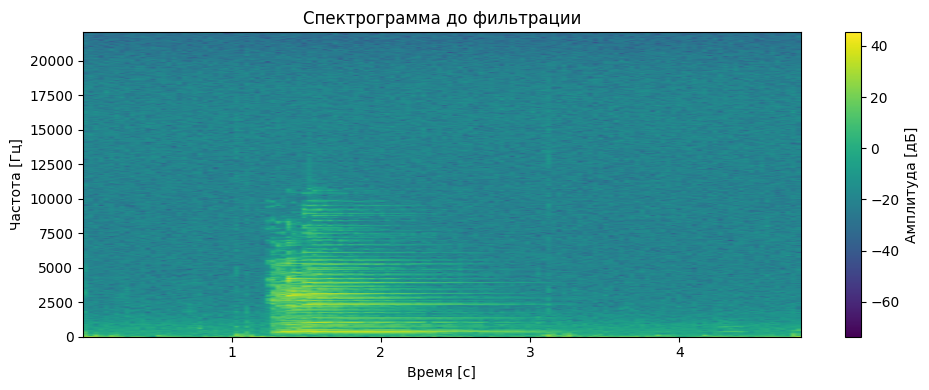

In [32]:
paint_spectrogram(x, samplerate, title='Спектрограмма до фильтрации')



In [33]:
lowcut_band = 200
highcut_band = 600

In [34]:
Audio(x, rate=samplerate)

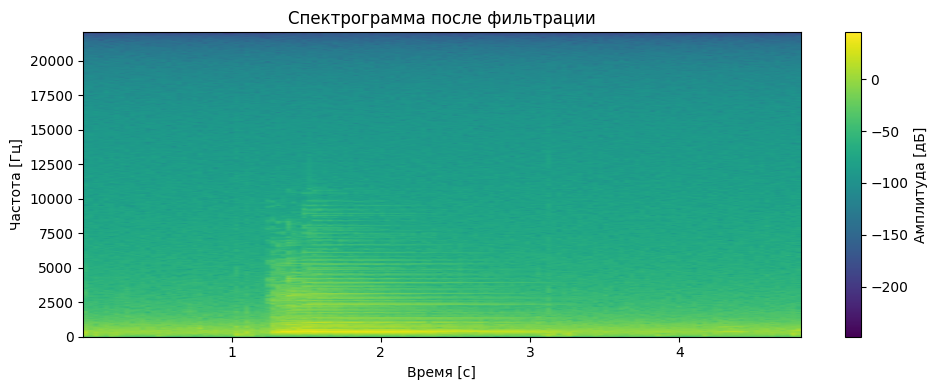

In [49]:
filtered_signal = apply_filter(x, lowcut_band, highcut_band, samplerate)

paint_spectrogram(filtered_signal, samplerate, title='Спектрограмма после фильтрации')
plt.show()


In [50]:
Audio(filtered_signal, rate=samplerate)

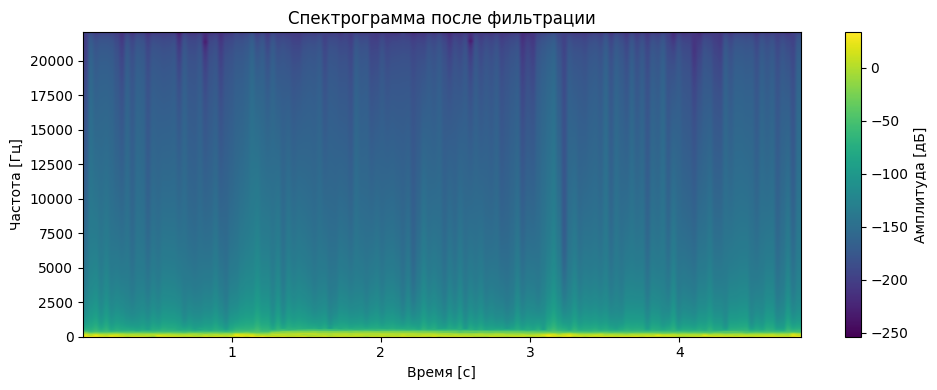

In [51]:
filtered_signal = low_pass_filter(x, lowcut_band, samplerate)
paint_spectrogram(filtered_signal, samplerate, title='Спектрограмма после фильтрации')
plt.show()

In [52]:
Audio(filtered_signal, rate=samplerate)

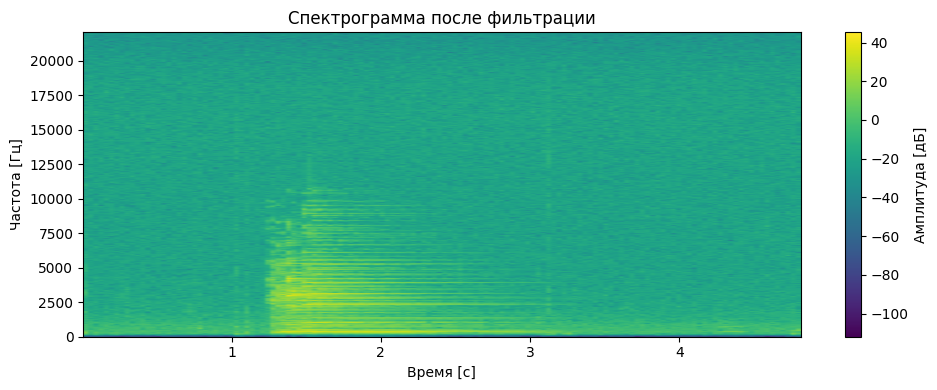

In [53]:
filtered_signal = high_pass_filter(x, lowcut_band, samplerate)
paint_spectrogram(filtered_signal, samplerate, title='Спектрограмма после фильтрации')
plt.show()

In [54]:
Audio(filtered_signal, rate=samplerate)

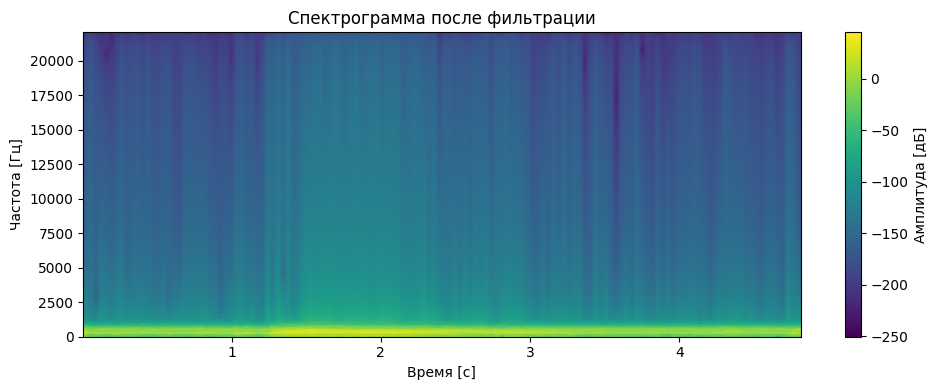

In [55]:
filtered_signal_band_pass = band_pass_filter(x, lowcut_band, highcut_band, samplerate)
paint_spectrogram(filtered_signal_band_pass, samplerate, title='Спектрограмма после фильтрации')
plt.show()

In [56]:
Audio(filtered_signal_band_pass, rate=samplerate)

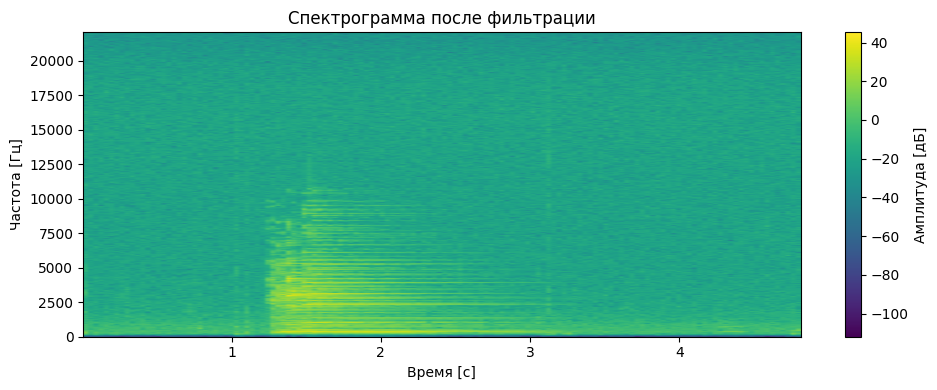

In [57]:
# Полосовой затухающий фильтр
filtered_signal_bandstop = band_stop_filter(x, lowcut_band, highcut_band, samplerate)
paint_spectrogram(filtered_signal, samplerate, title='Спектрограмма после фильтрации')
plt.show()

In [58]:
Audio(filtered_signal_bandstop, rate=samplerate)

In [46]:
среда понедельник четверг минус

понедлельник вторник сашу можно найти

In [47]:
! pip install  libasound-dev

ERROR: Could not find a version that satisfies the requirement libasound-dev (from versions: none)
ERROR: No matching distribution found for libasound-dev
